In [71]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [4]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


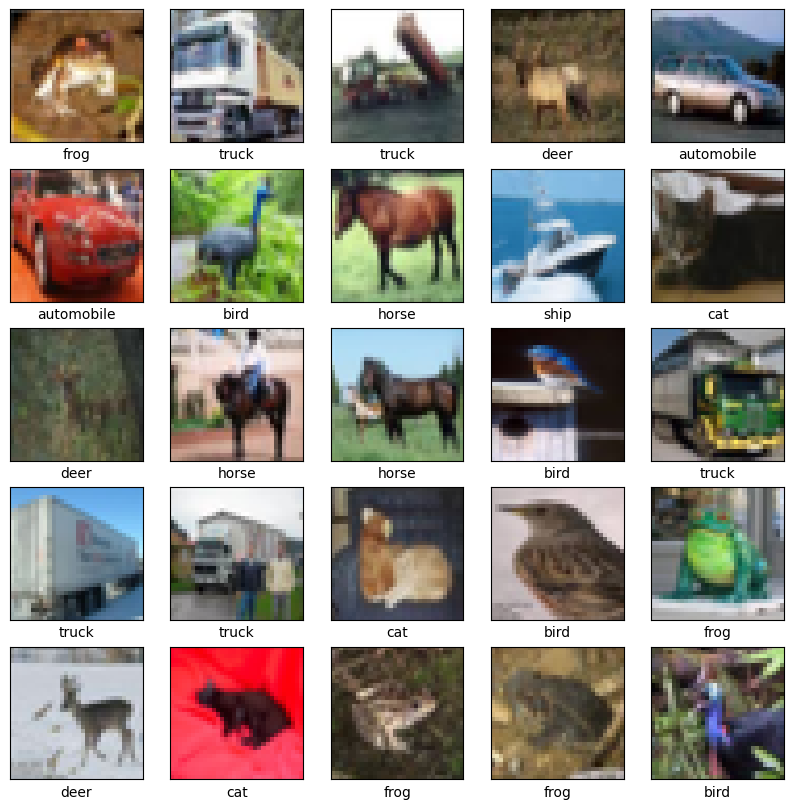

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
# Normalizing
X_train_nm = X_train/255
X_test_nm = X_test/255

# One-Hot-Encoding
y_train_en = to_categorical(y_train,10)
y_test_en = to_categorical(y_test,10)

In [8]:
print(y_train[0])
print(y_train_en[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [10]:
print(X_train_nm[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [11]:
# Base Model
model = models.Sequential()

model.add(Input(shape=X_train_nm.shape[1:]))

model.add(layers.Conv2D(32,(4,4), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Conv2D(32,(4,4), activation='relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation ='relu'))
model.add(layers.Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,802 (475.79 KB)

 Trainable params: 121,802 (475.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train_nm, y_train_en, epochs = 30, verbose=1, validation_data=(X_test_nm, y_test_en))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3672 - loss: 1.7298 - val_accuracy: 0.5498 - val_loss: 1.2592
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5723 - loss: 1.2153 - val_accuracy: 0.6053 - val_loss: 1.1284
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6263 - loss: 1.0729 - val_accuracy: 0.6342 - val_loss: 1.0523
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6611 - loss: 0.9693 - val_accuracy: 0.6471 - val_loss: 1.0207
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6843 - loss: 0.9019 - val_accuracy: 0.6556 - val_loss: 0.9993
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7144 - loss: 0.8252 - val_accuracy: 0.6625 - val_loss: 0.9823
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7352 - loss: 0.7732 - val_accuracy: 0.6632 - val_loss: 0.9794
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7454 - loss: 0.7282 - 

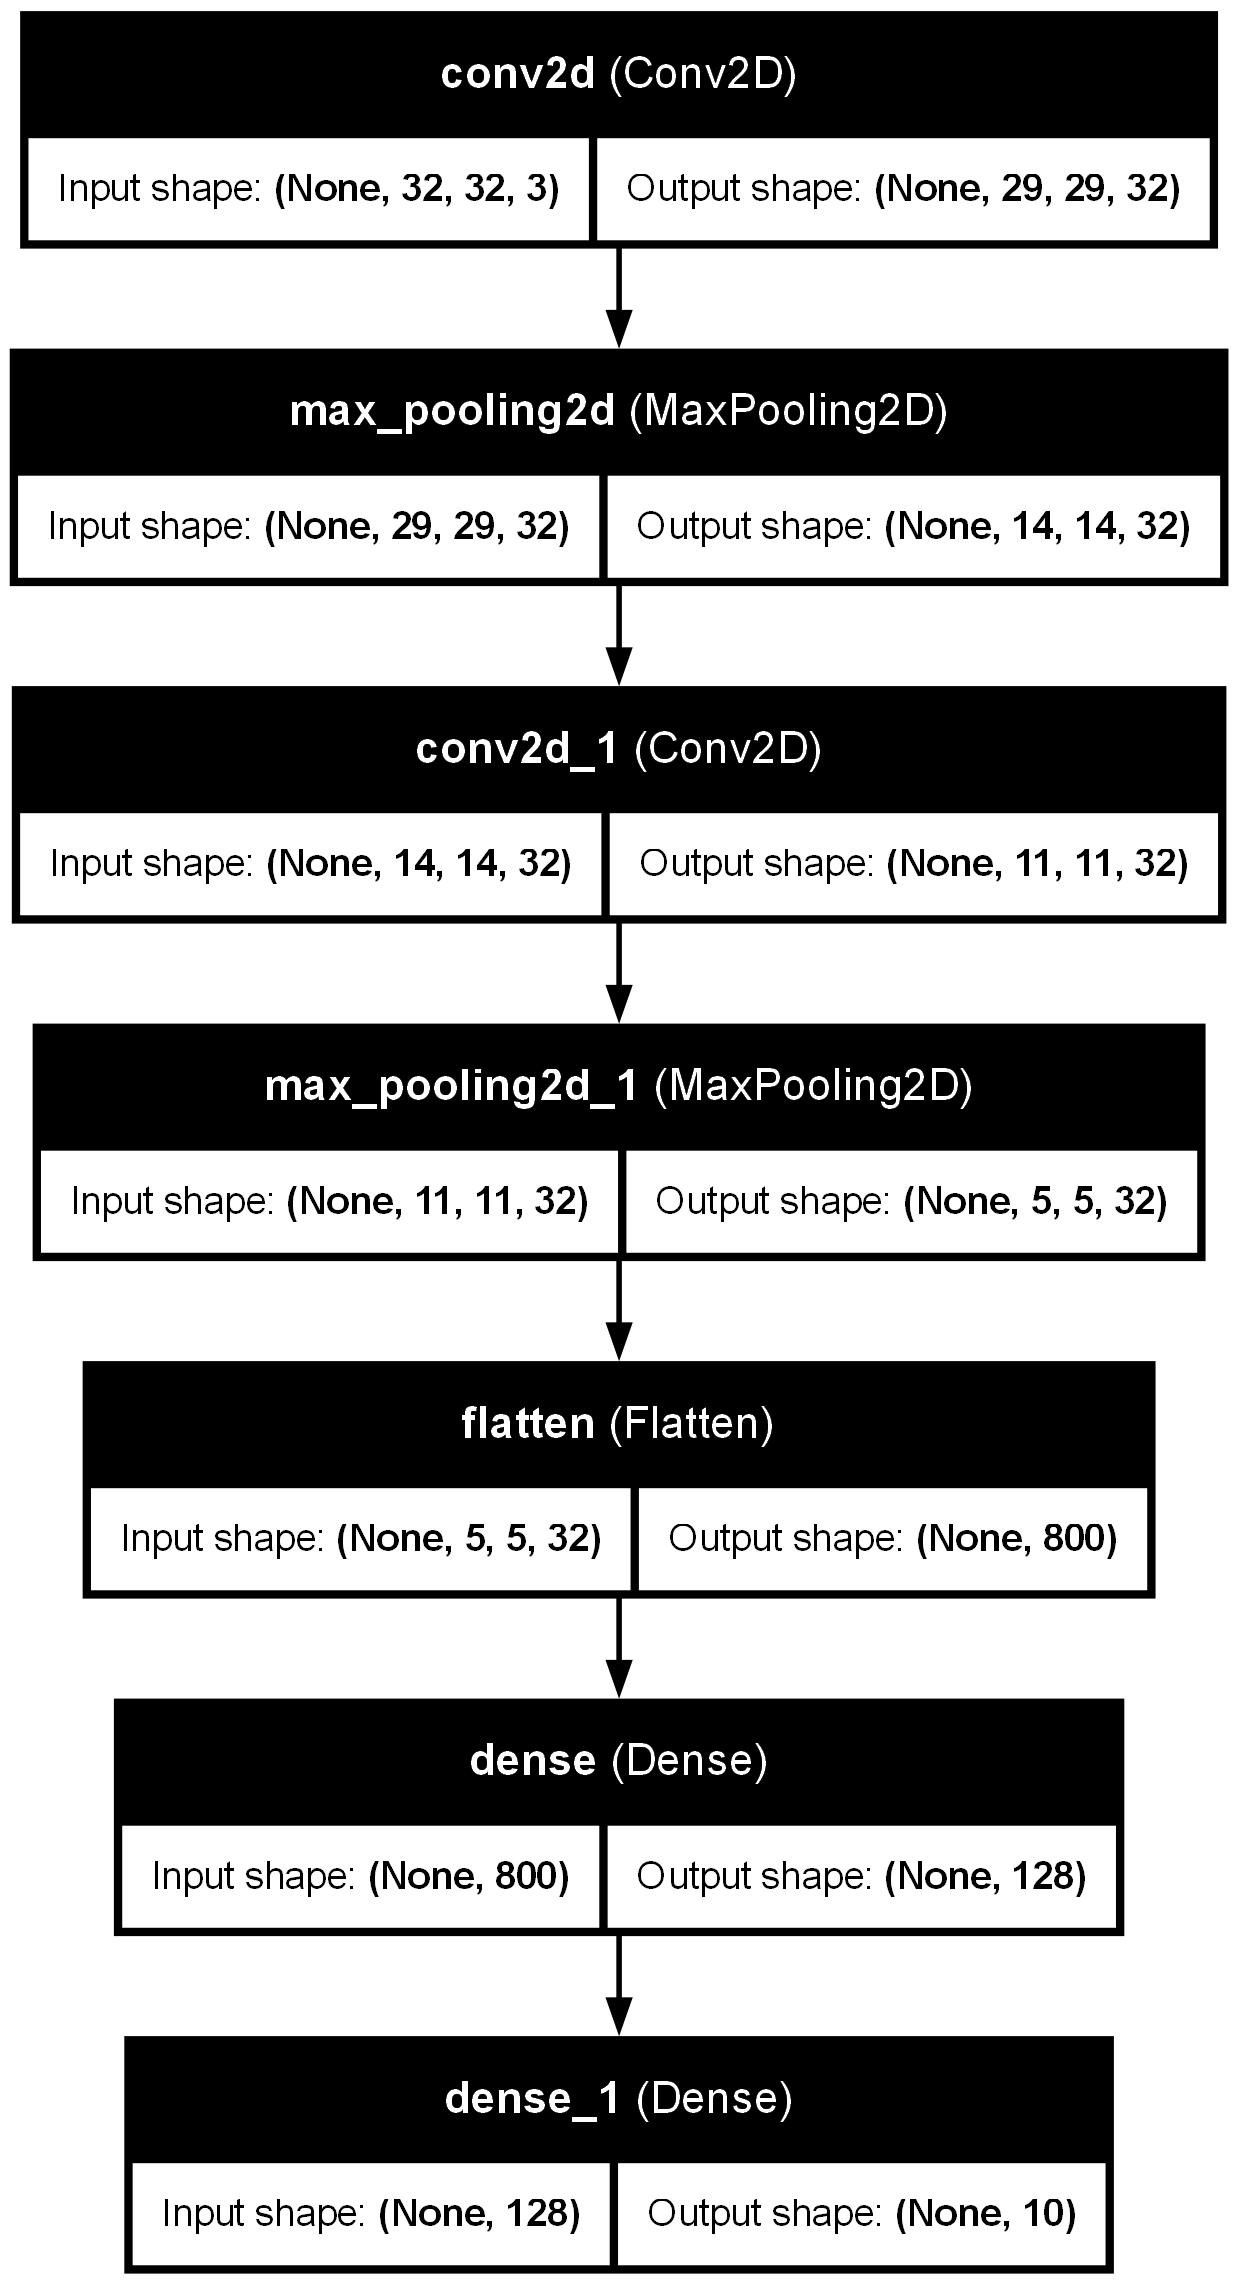

In [76]:
plot_model(model, to_file='base_model.png', show_shapes=True, show_layer_names=True)

c:\Users\loi27\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


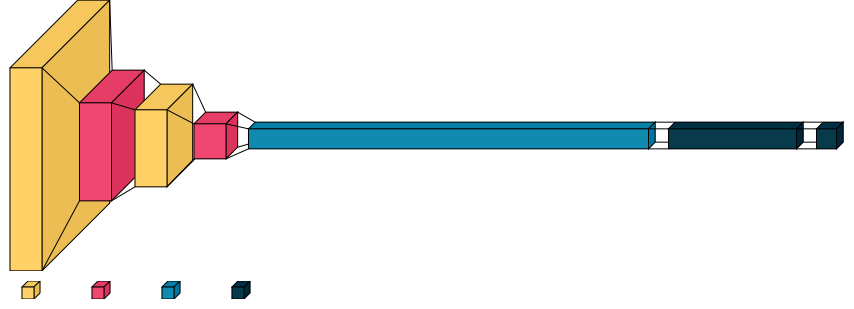

In [37]:
import visualkeras

# Display the model with layer names
visualkeras.layered_view(model, legend=True, spacing=20, scale_xy=7, scale_z= 1)

In [41]:
evaluation = model.evaluate(X_test_nm, y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6581 - loss: 1.9425
Test Accuracy of Base Model: 0.651199996471405


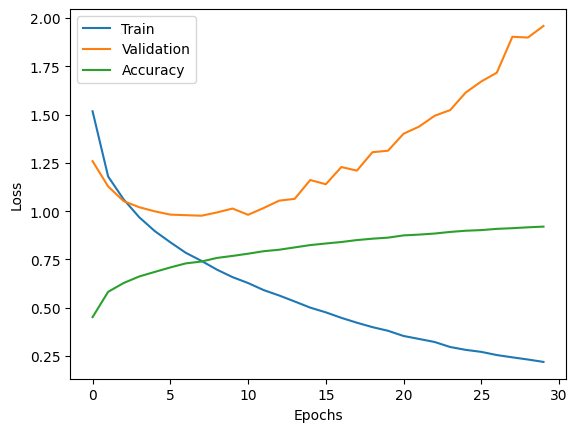

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Accuracy'])
plt.show()

After running our base model with 30 Epochs, we are getting 92.93% training accuracy and 65.12% test accuracy which is good but as we can see the validation loss is continuously increasing from the first epoch till the last epoch i.e our base model is overfitting.

We can achieve this by adding a few dropout layers in our model. Now we are building our model by dropping 25% of units.

In [60]:
# Model_1 with Dropouts
model_1 = models.Sequential()

model_1.add(Input(shape=X_train_nm.shape[1:]))

model_1.add(layers.Conv2D(64,(4,4),activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.5)) 

model_1.add(layers.Conv2D(64,(4,4),activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(layers.Dropout(0.25))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(256,activation='relu'))
model_1.add(layers.Dense(10,activation='softmax'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model_1.summary()
history_1 = model_1.fit(X_train_nm, y_train_en, epochs = 50, verbose=1, validation_data=(X_test_nm,y_test_en))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,443,488 (5.51 MB)

 Trainable params: 481,162 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 962,326 (3.67 MB)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2523 - loss: 2.0012 - val_accuracy: 0.4553 - val_loss: 1.5084
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4547 - loss: 1.4949 - val_accuracy: 0.5586 - val_loss: 1.2544
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5411 - loss: 1.2879 - val_accuracy: 0.5855 - val_loss: 1.1795
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5925 - loss: 1.1590 - val_accuracy: 0.6353 - val_loss: 1.0465
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6209 - loss: 1.0734 - val_accuracy: 0.6455 - val_loss: 1.0157
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6412 - loss: 1.0191 - val_accuracy: 0.6670 - val_loss: 0.9451
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6655 - loss: 0.9643 - val_accuracy: 0.6841 - val_loss: 0.9230
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6732 - loss: 0

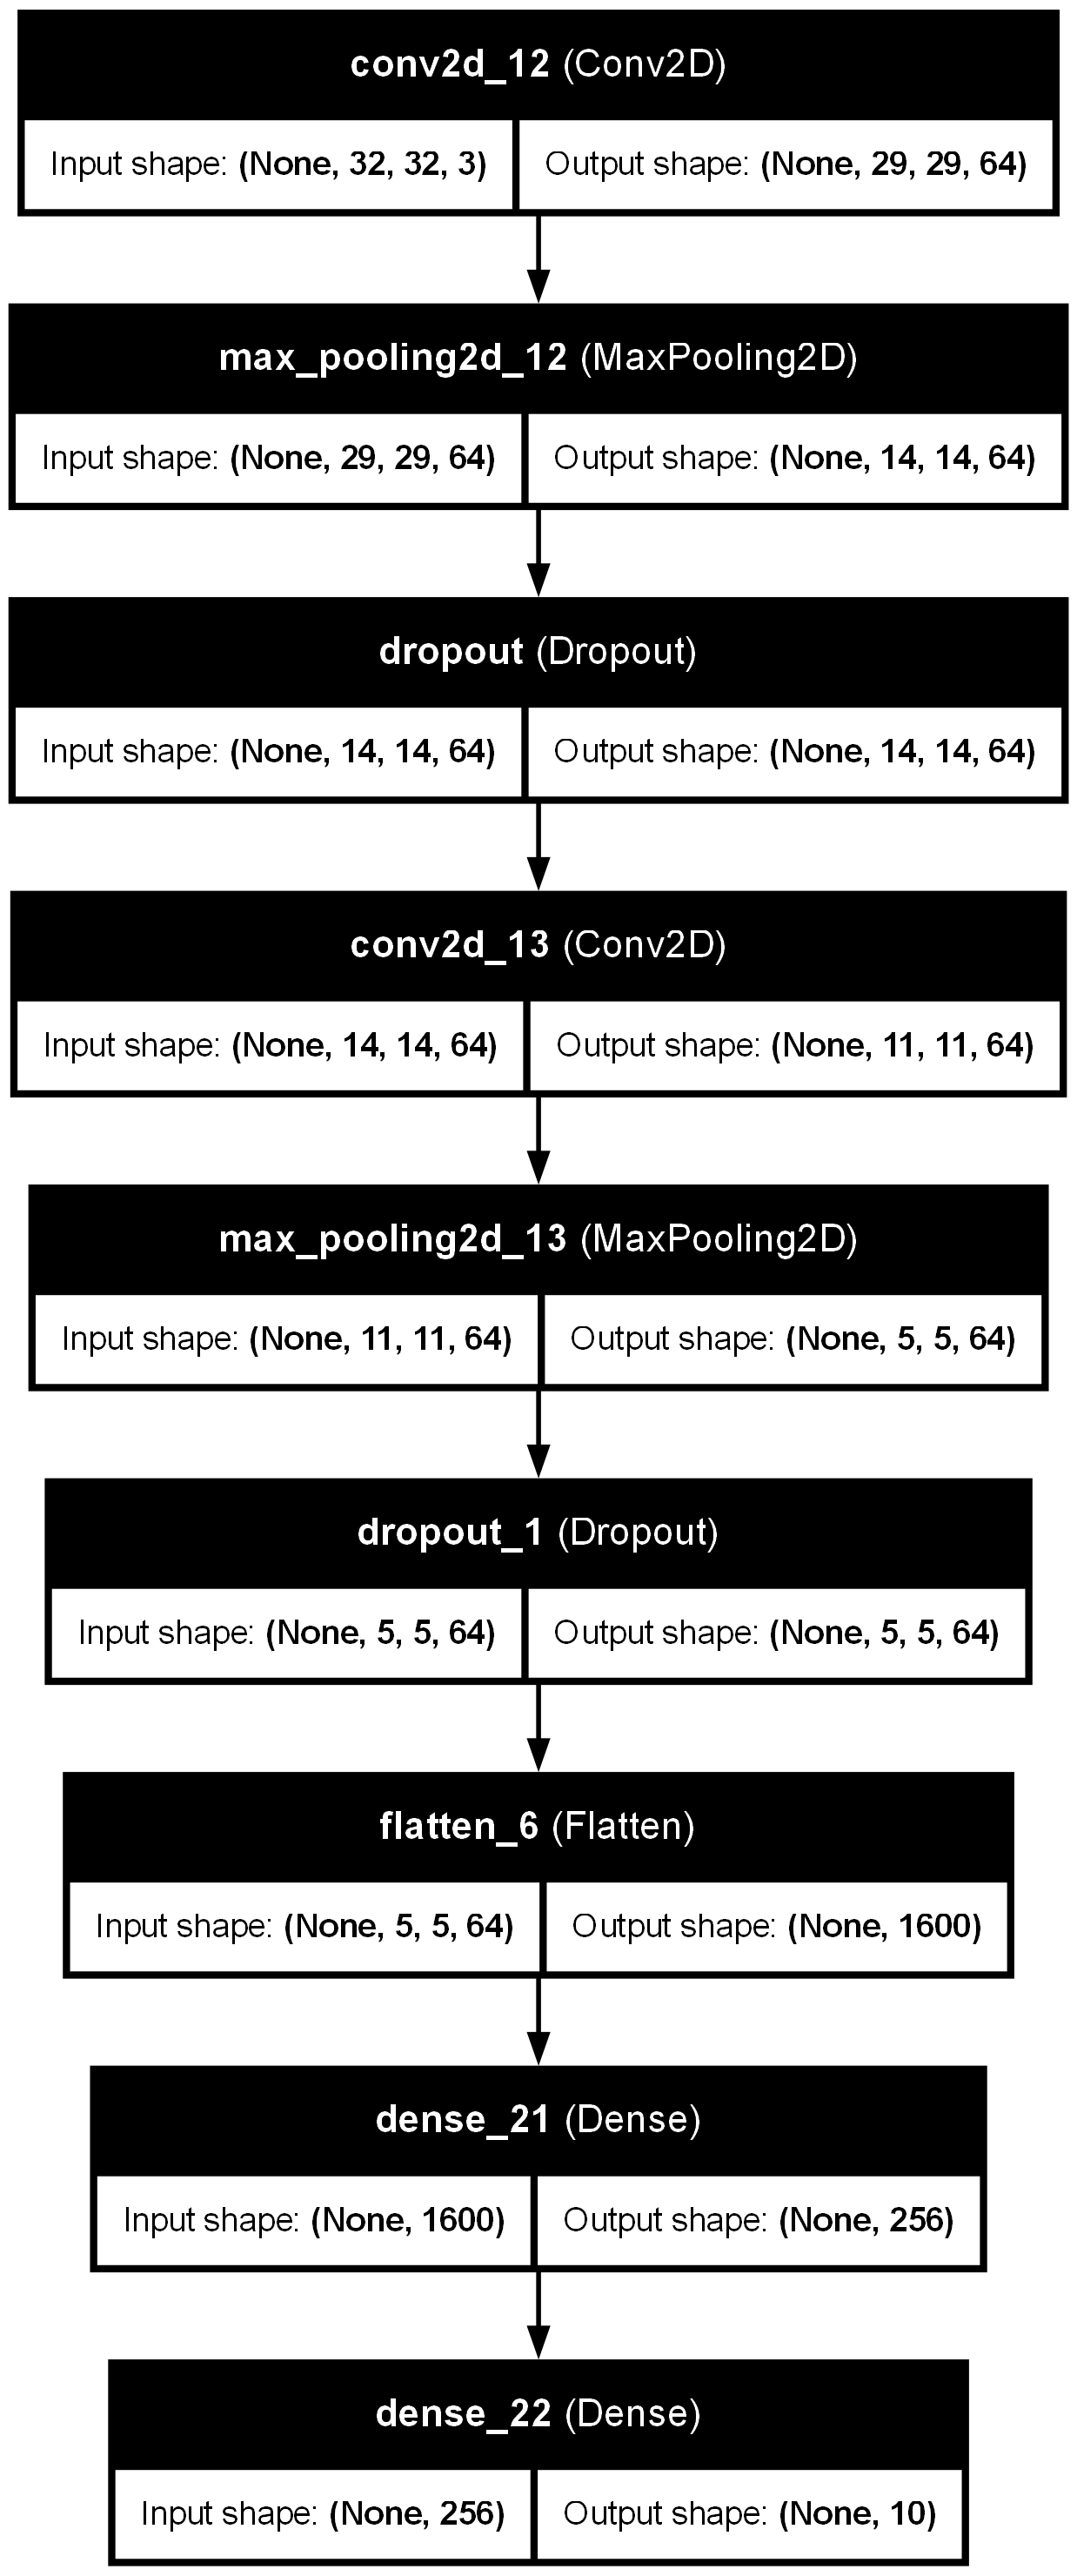

In [81]:
plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [63]:
evaluation = model_1.evaluate(X_test_nm, y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7364 - loss: 0.8768
Test Accuracy of Model_1(with Dropouts): 0.7315000295639038


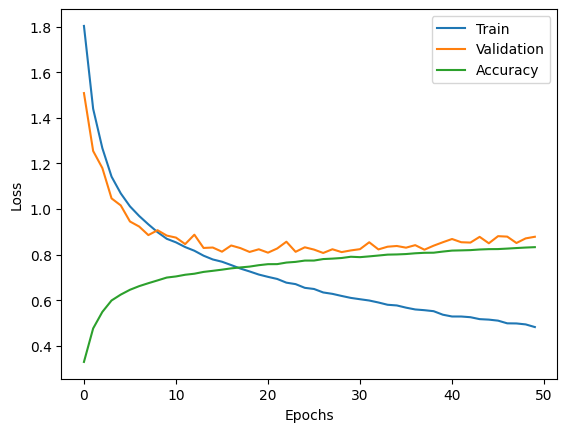

In [64]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.plot(history_1.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Accuracy'])
plt.show()

After running our model_1 with 50 Epochs, we can see that the validation accuracy has improved from 65.12% to 73.15% due to reduction in our model’s validation loss from 1.9595 to 1.0879.

We will continue to train our model by increasing the number of epochs and by adding more filters.

In [66]:
# Model_2 with more filters
model_2 = models.Sequential()

model_2.add(Input(shape=X_train_nm.shape[1:]))

model_2.add(layers.Conv2D(64,(4,4),activation='relu'))
model_2.add(layers.Conv2D(64,(4,4),activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.4)) 

model_2.add(layers.Conv2D(128,(4,4),activation='relu'))
model_2.add(layers.Conv2D(128,(4,4),activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(layers.Dropout(0.4))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(1024,activation='relu'))
model_2.add(layers.Dense(1024,activation='relu'))
model_2.add(layers.Dense(10, activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [67]:
model_2.summary()
history_2 = model_2.fit(X_train_nm, y_train_en, epochs = 100, verbose=1, validation_data=(X_test_nm,y_test_en))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 64)     │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 10, 10, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1024)           │     1,180,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,702,730 (10.31 MB)

 Trainable params: 2,702,730 (10.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.2760 - loss: 1.9050 - val_accuracy: 0.4731 - val_loss: 1.4213
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4853 - loss: 1.4210 - val_accuracy: 0.5704 - val_loss: 1.2319
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.5574 - loss: 1.2439 - val_accuracy: 0.6111 - val_loss: 1.0923
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5966 - loss: 1.1283 - val_accuracy: 0.6207 - val_loss: 1.0794
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6257 - loss: 1.0603 - val_accuracy: 0.6418 - val_loss: 1.0142
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.6496 - loss: 0.9936 - val_accuracy: 0.6790 - val_loss: 0.9145
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6620 - loss: 0.9617 - val_accuracy: 0.6696 - val_loss: 0.9331
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 

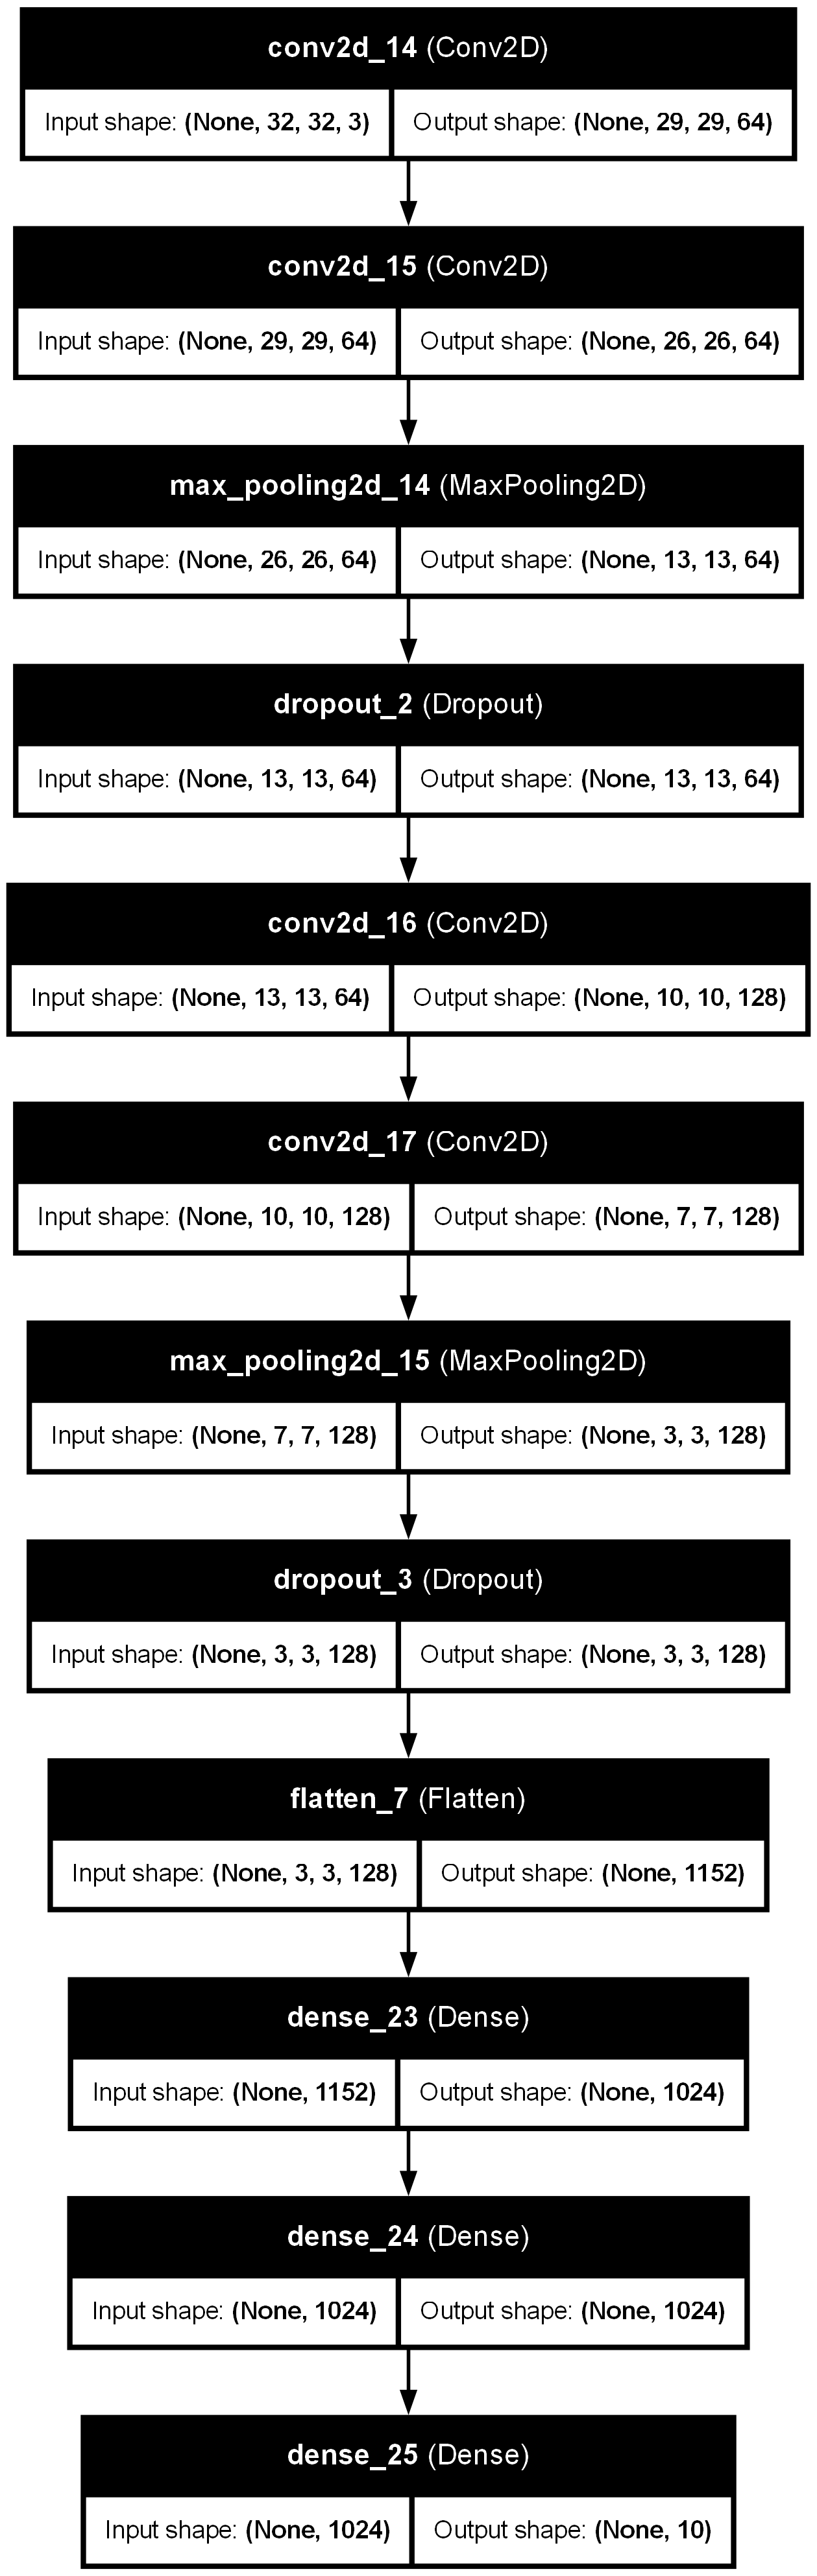

In [82]:
plot_model(model_2, to_file='model_2.png', show_shapes=True, show_layer_names=True)

In [68]:
evaluation = model_2.evaluate(X_test_nm, y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7702 - loss: 0.7918
Test Accuracy of Model_2(with more  filters): 0.761900007724762


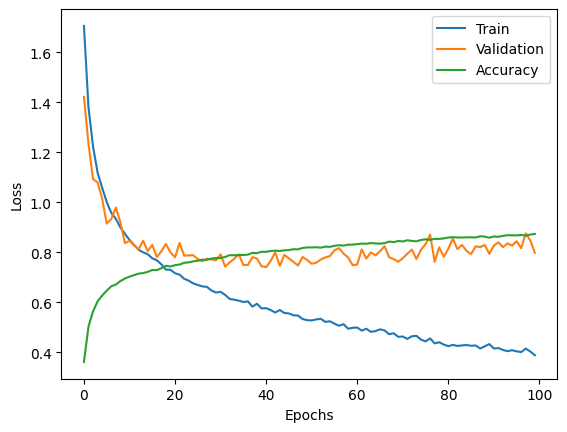

In [69]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_2.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Accuracy'])
plt.show() 

After running our model_2 with 100 Epochs, we can see that the validation accuracy has further improved from 73.15% to 76.19%

We will continue to train our model by adding Batch Normalization.

In [83]:
# Model_3 with Batch Normalization
model_3 = models.Sequential()

model_3.add(layers.Conv2D(64,(4,4),activation='relu',padding='same'))
model_3.add(layers.BatchNormalization())

model_3.add(layers.Conv2D(64,(4,4),activation='relu',padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D(pool_size=(2,2)))
model_3.add(layers.Dropout(0.2))

model_3.add(layers.Conv2D(128,(4,4),activation='relu',padding='same'))
model_3.add(layers.BatchNormalization())

model_3.add(layers.Conv2D(128,(4,4),activation='relu',padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D(pool_size=(2,2)))
model_3.add(layers.Dropout(0.25))

model_3.add(layers.Conv2D(128,(4,4),activation='relu',padding='same'))
model_3.add(layers.BatchNormalization())

model_3.add(layers.Conv2D(128,(4,4),activation='relu',padding='same'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D(pool_size=(2,2)))
model_3.add(layers.Dropout(0.35))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
model_3.summary()
history_3 = model_3.fit(X_train_nm, y_train_en, epochs = 100, verbose = 1, validation_data = (X_test_nm, y_test_en))

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 74ms/step - accuracy: 0.3582 - loss: 1.9933 - val_accuracy: 0.5986 - val_loss: 1.1526
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6561 - loss: 0.9882 - val_accuracy: 0.6831 - val_loss: 0.9005
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7319 - loss: 0.7750 - val_accuracy: 0.7012 - val_loss: 0.8680
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.7829 - loss: 0.6425 - val_accuracy: 0.7830 - val_loss: 0.6300
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.8158 - loss: 0.5415 - val_accuracy: 0.7955 - val_loss: 0.5927
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.8412 - loss: 0.4624 - val_accuracy: 0.8101 - val_loss: 0.5671
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.8633 - loss: 0.4065 - val_accuracy: 0.8283 - val_loss: 0.5061
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - ac

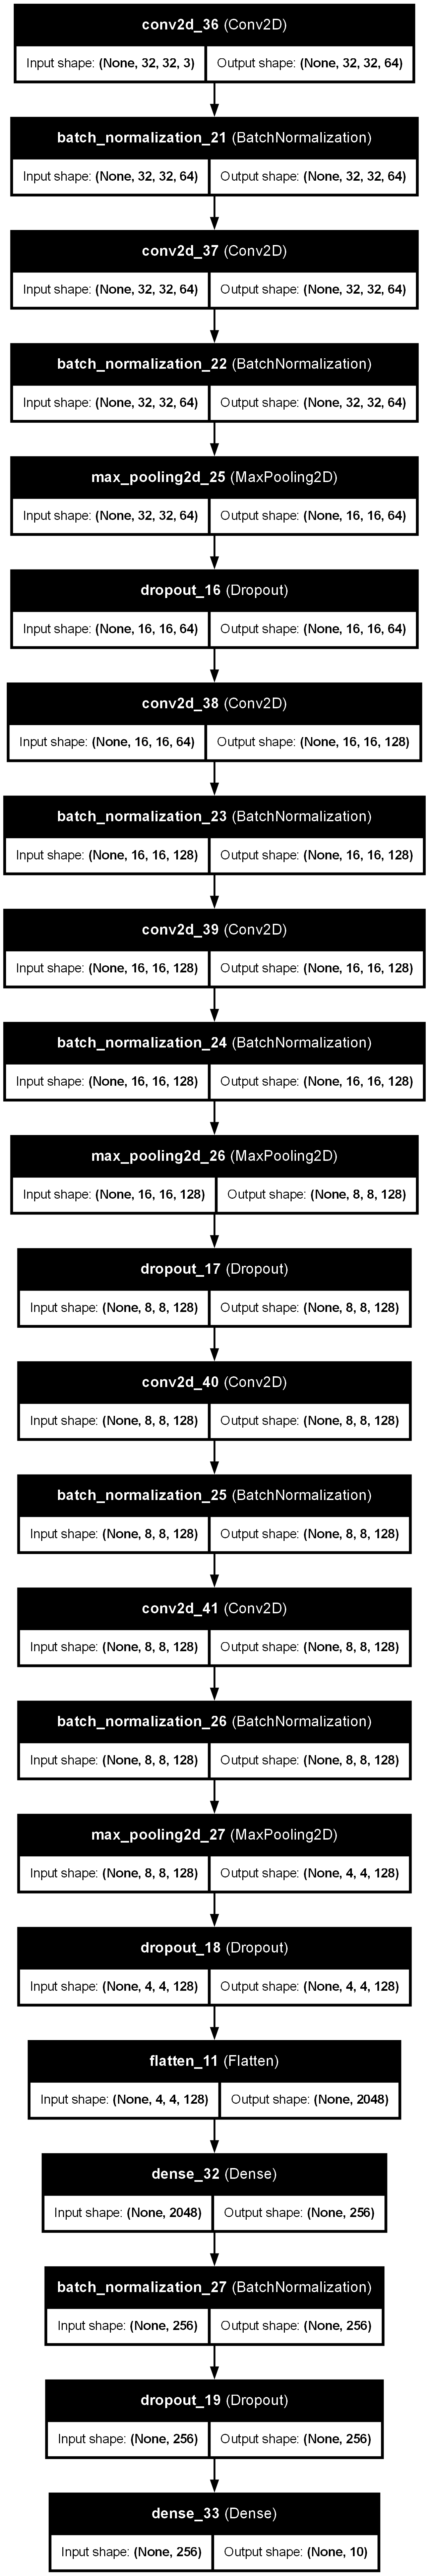

In [85]:
plot_model(model_3, to_file='model_3.png', show_shapes=True, show_layer_names=True)

In [86]:
evaluation = model_3.evaluate(X_test_nm, y_test_en)
print('Test Accuracy of Model_3 (with Batch Normalization): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8782 - loss: 0.6434
Test Accuracy of Model_3 (with Batch Normalization): 0.8761000037193298


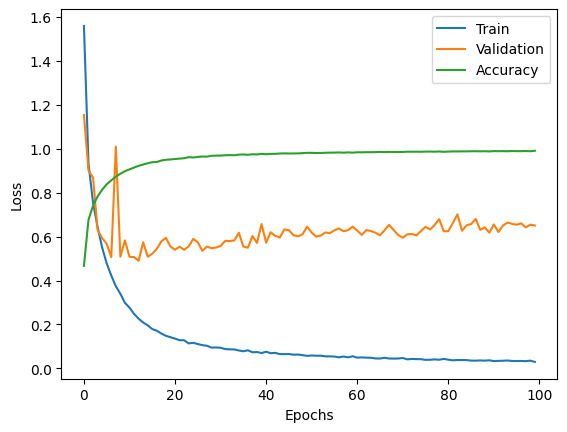

In [87]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_3.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Accuracy'])
plt.show()

After running our model_3 with Batch Normalization, we can see that the validation accuracy has further improved from 76.19% to 87.61%